In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as scpo

In [50]:
data = gpd.read_file('./data/landkreise_merged_i.geojson')
data = data.set_index('name')

In [154]:
bundeslaender = data[data.art == 'bundesland']
landkreise = data[data.art == 'landkreis']
dateColNames = landkreise.columns[4:-2]
landkreise[dateColNames] = landkreise[dateColNames].astype(np.int64)
bundeslaender[dateColNames] = landkreise.groupby('partof')[dateColNames].sum()

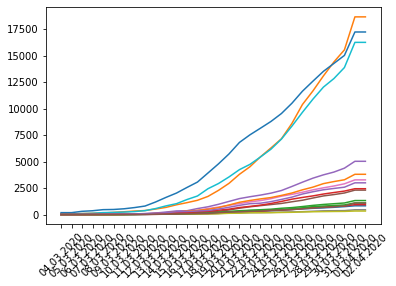

In [166]:
plt.xticks(rotation=45)
for l in bundeslaender.index:
    plt.plot(dateColNames, bundeslaender.loc[l][dateColNames])